In [ ]:
'''
camera calibration for distorted images with chess board samples
reads distorted images, calculates the calibration and write undistorted images
usage:
Code forked from OpenCV:
https://github.com/opencv/opencv/blob/a8e2922467bb5bb8809fc8ae6b7233893c6db917/samples/python/calibrate.py
released under BSD 3 license
'''

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import cv2
import glob
import time
import os
import logging
import argparse
import sys

# select
images = glob.glob('/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/*.jpg')
out_path = 'Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal_out/'

out = True # optional argument for output

In [23]:
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.DEBUG)

pattern_x = 10 
pattern_y = 7
square_size = 25 #mm

pattern_size = (pattern_x -1, pattern_y - 1) # For some reason you have to subtract 1
pattern_points = np.zeros((np.prod(pattern_size), 3), np.float32)
pattern_points[:, :2] = np.indices(pattern_size).T.reshape(-1, 2)
pattern_points *= square_size


obj_points = []
img_points = []
h, w = 0, 0
img_names_undistort = []

print('img: ', images, end='')

img:  ['/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration1.jpg', '/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration10.jpg', '/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration11.jpg', '/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration12.jpg', '/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration13.jpg', '/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration14.jpg', '/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration15.jpg', '/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration16.jpg', '/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration17.jpg', '/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration18.jpg', '/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration19.jpg', '/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibr

In [28]:
for fn in images:
    print('processing %s... ' % fn, end='')
    img = cv2.imread(fn, 0)
    if img is None:
        print("Failed to load", fn)
        continue

    h, w = img.shape[:2]
    found, corners = cv2.findChessboardCorners(img, pattern_size)
    if found:
        term = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1)
        cv2.cornerSubPix(img, corners, (5, 5), (-1, -1), term)

    if out:
        vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        cv2.drawChessboardCorners(vis, pattern_size, corners, found)
        name = os.path.basename(fn)
        #path, name, ext = splitfn(fn)
        outfile = os.path.join(out_path, name + '_chess.png')
        cv2.imwrite(outfile, vis)
        if found:
            img_names_undistort.append(outfile)

    if not found:
        print('chessboard not found')
        continue

    img_points.append(corners.reshape(-1, 2))
    obj_points.append(pattern_points)

    print('ok')

# calculate camera distortion
rms, camera_matrix, dist_coefs, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, (w, h), None, None)

print("\nRMS:", rms)
print("camera matrix:\n", camera_matrix)
# print("matrix: \n", type(camera_matrix))
print("distortion coefficients: ", dist_coefs.ravel())


processing /Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration1.jpg... chessboard not found
processing /Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration10.jpg... ok
processing /Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration11.jpg... ok
processing /Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration12.jpg... ok
processing /Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration13.jpg... ok
processing /Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration14.jpg... ok
processing /Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration15.jpg... ok
processing /Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration16.jpg... ok
processing /Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration17.jpg... ok
processing /Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration18.jpg... ok
pro

In [27]:
# write to matrix to be used as input
with open(os.path.join(out_path, "matrix.txt"), "a") as matf:
    camera_matrix.reshape((3, 3))
    np.savetxt(matf, (camera_matrix[0], camera_matrix[1], camera_matrix[2]), fmt='%-12.8f')

with open(os.path.join(out_path, "distortion.txt"), "a") as distf:
    np.savetxt(distf, dist_coefs.ravel(), fmt='%.12f')

FileNotFoundError: [Errno 2] No such file or directory: 'Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal_out/matrix.txt'

processing /Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration2.jpg... OK


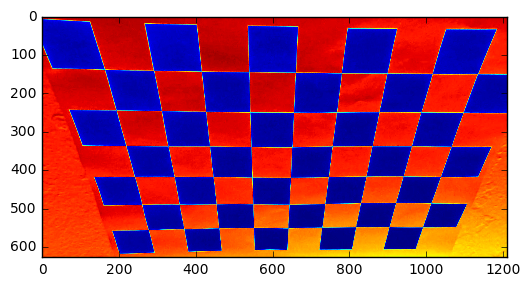

In [19]:
# undistort the image with the calibration
# img_names_undistort = ['/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal/calibration2.jpg']

for img_found in img_names_undistort:
    print('processing %s... ' % img_found, end='')
    img = cv2.imread(img_found, 0)
    if img is None:
        print("Failed to load", fn)
        continue

    h,  w = img.shape[:2]
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coefs, (w, h), 1, (w, h))

    dst = cv2.undistort(img, camera_matrix, dist_coefs, None, newcameramtx)
    
    print('OK')

    # crop and save the image
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]
    #outfile = os.path.join(out_path, name + '_undistorted.png')
    #cv2.imwrite(outfile, dst)
    #print('Undistorted image written to: %s' % outfile)
    plt.imshow(dst)

In [29]:
print(os.path.join(out_path, "matrix.txt"))

Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/camera_cal_out/matrix.txt
